## Discrete Optimization Problems:
Main branches include but not only:
- Combinatorial optimization:
    - Graphs
    - Matroids
- Integer programming:
    - Linear programming
- ...

For this portfolio, it will mainly focus on **Graph**, which will include topics like **shortest path algorithms** and **combinatorial optimization**.

## Necessary package loading:

For the sake of running codes for general implementations' presentation in case, we will import some libraries.

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pulp
import osmnx as ox
from scipy.spatial import distance
import math
import geopandas as gpd
from itertools import combinations
import geopy.distance
import pandas as pd
import random

## Topics: 
#### Preface: **Introduction to Graphs**

#### Shortest Path Problems:
1. Dijkestra's algorithm
2. A* algorithm
    


#### Graph Coloring Problems:
3. Combinatorial problem
4. Schedule problem
5. Graph theory's general concepts
6. TSP problem


#### Practical Problem:
7. Combination of **Shortest Path Problems** and **Graph Coloring**

#### Cover Letter

## Preface: Introduction to Graphs

- *Definition*:
    - Graphs are data structures used to represent "connections" between pairs of elements.
        - **Nodes**: The elements, which can represent objects, entities, etc.
        - **Edges**: The connections between nodes.
        - Two nodes are **connected** if there is an edge between them.

- *Types*:
    - **Undirected**: If for every pair of connected nodes, we can go from one node to the other in both directions.
    - **Directed**: If for every pair of connected nodes, we can only go from one node to another in a specific direction. We use **arrows** to represent directed edges.
    - **Weighted Graph**: If for a graph whose edges have a *weight* or *cost*. The weight of an edge can represent distance, time, etc.

### Shortest Path Algorithms

- Purpose: Finding the shortest path between two vertices in a graph.
- Variations:
    - **(SSSP)** *Single-source shortest path*: <br>
    It requires finding the shortest path from a source node to all other nodes in a weighted graph<br> 
    i.e. **$\text{Min }\sum$ (the weightes of the edges in the paths)**.
    - **(BFS)** *Breadth-first search*: <br>
    It finds the shortest path from a source node to all other nodes in an unweighted graph<br>
     i.e. **$\text{Min }$ the number of edges in the path**.
    - **(APSP)** *All-pairs shortest path*: <br>
    It requires finding the shortest path between all pairs of nodes in a graph.
    - **(SSWP)** *Single-source widest path*:<br>
     It requires finding the path from a source node to all other nodes in a *weighted graph*,<br> such that the weight of the minimum-weight edge of the path is maximized.

## 1. Dijkestra's algorithm

- Purpose: Finding the shortest path from a node (*source node*) to all other nodes in the graph, producing a shortest-path tree.
- Basics:
    - It keeps track of the currently known shortest distance from each node to the source node and updates these values if it finds a shorter path.
    - Once the algorithm has found the shortest path between the source node and another node, that node is marked as *visited* and added to the path.
    - The process continues until all the nodes in the graph have been added to the path. (*greedy search*)
- Requirements:
    - It can only work with graphs that have **positive weights**. This is because, during the process, the weights of the edges have to be added to find the shortest path. If there is a negative weight in the graph, then it won't work properly since negative weights can alter this if the total weight can be decremented.
- Example:

In [8]:
G_example = nx.DiGraph()
G_example.add_edge('0', '1', weight=2)
G_example.add_edge('0', '2', weight=6)
G_example.add_edge('1', '3', weight=5)
G_example.add_edge('2', '3', weight=8)
G_example.add_edge('3', '5', weight=15)
G_example.add_edge('3', '4', weight=10)
G_example.add_edge('5', '4', weight=6)
G_example.add_edge('5', '6', weight=6)
G_example.add_edge('4', '6', weight=2)

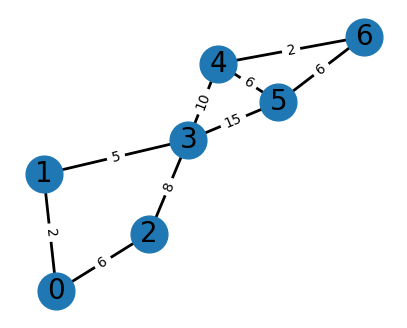

In [9]:
# Convert to undirected graph
G_undirected = G_example.to_undirected()

# Plot the undirected graph
plt.figure(figsize=(5, 4))
pos = nx.spring_layout(G_undirected)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G_undirected, pos, node_size=700)

# Edges
nx.draw_networkx_edges(G_undirected, pos, width=2)

# Labels
nx.draw_networkx_labels(G_undirected, pos, font_size=20, font_family="sans-serif")

# Edge weight labels
edge_labels = nx.get_edge_attributes(G_undirected, "weight")
nx.draw_networkx_edge_labels(G_undirected, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

#### 1.1 General Dijkestra's algorithm

Referring to the sample graph created above, we will generate the shortest path from *node 0* to all the other nodes in the graph.
<br>
We will find the shortest path from *node 0* $\to$ *node 1*, *node 2*, etc, so on for every node in the graph.
<br>

General steps:
- Since we choose to start at node 0, we can mark this node as *visited*.
- It has neighbours *node 1* and *node 2*, with weights *2* and *6* respectively.
- We mark *node 1* as it is the shortest path we find so far.
- For reaching *node 3*, we select the path of $0 \to 1 \to 3$ based on the previous selection for the shortest path, we have the total distance as *2 + 5 = 7*. 
    - (for $0 \to 2 \to 3$, it will be *6 + 8 = 14 > 7*)
- Repeating procedures, we have:
    - For *node 4*: $0 \to 1 \to 3 \to 4 = 17$
    - For *node 5*: $0 \to 1 \to 3 \to 5 = 22$
- For choosing unvisited node, *node 4* has the shortest distance in the listed approaches so far.
    - For node 5:
        - $0 \to 1 \to 3 \to 5 = 2 + 5 + 15 = 22$
        - $0 \to 1 \to 3 \to 4 \to 5 = 2 + 5 + 10 + 6 = 23 > 22$
        - Therefore, we choose the first path.
    - For node 6:
        - $0 \to 1 \to 3 \to 4 \to 6 = 2 + 5 + 10 + 2 = 19$
- In summary, we have the shortest paths listed:
    - $0 \to 0 = 0$
    - $0 \to 1 = 2$
    - $0 \to 2 = 6$
    - $0 \to 3 = 7$
    - $0 \to 4 = 17$
    - $0 \to 5 = 22$
    - $0 \to 6 = 19$

##### Mathematical Approach

Dijkestra's algorithm computes lengths of shortest paths from a start vertex $s$ to every other vetex in a weighte graph with nonnegative weights. 

It works by successively improving an approximation $d[v]$ to the shortest path length $\delta(s,v)$ from $s$ to $v$, which is initially $d[s] = 0$ and $d[v] = \infty$ for $v \neq s$.

The algorithm maintains a priority quese $Q$ of verties which haven't yet been processed, initially containing just $s$ with priority 0, and a set $S$ of vertices whose true distance to $s$ is known. It works as follows:

```
while Q is not empty:
    # The function extract_min pops a vertex with min d-value out of Q
    u = extract_min(Q)
    S.add(u)

    # adj(v) is the vertices adjacent to v and w(u,v)
    for v in adj(u):
        # w(u,v) is the weight of the edge from u to v. 
        if v not in S and d[v] > d[u] + w(u,v):
            d[v] = d[u] + w(u,v)
            Q.add(v, priority=d[v])

    # The procedure inside the conditional is called relaxing the edge (u,v)
```

- Note:
    - *Relaxation (approximation)* is a modelling strategy. **It is different from iterative method.**

    - A relaxation is an approximation of a difficult problem by a nearby problem that is easier to solve.

    - A solution of the relaxed problem provides information about the original problem.

#### 1.2 Bidirectional Dijkestra's algorithm

If all we care about is $\delta(s,t)$ for some fixed t, we can speed it up for certain graphs as follows:

Suppose each vertex has outvalency about $m$, and the edge distance from $s$ to $t$ is $n$. Then if the edge weights are roughly equal, we expect to relax on the order of $m^n$ edges by the time we reach $t$.

On the other hand, if we run two searches, one starting at $s$ and the other at $t$, stopping when they meet in the middle, we would only relax $2m^{n/2}$ edges. This method is called *bidirectional dijkstra*.

The subtlety in bidirectional dijkstra is the stopping condition. When we detect an edge between the forward and backward sets $S_f, S_b$ of processed vertices, there is no guarantee a shortest path $s \to t$ passes through that edge.

We start with forward approximations $d_f[v]$ of the distance of a node from $s$ and backward approximations $d_b[v]$ of the distance of a node to $t$, initially all infinity except $d_f[s] = 0 = d_b[t]$.

We keep a forward priority queue $Q_f$ and a backward priority queue $Q_b$, initially containing $s$ and $t$ respectively, and sets $S_f$ and $S_b$ of vertices processed in the forward and backward searches, initially empty.

The priority of an element in the queue is its $d_f$ or $d_b$ value. We also keep a number $\mu$ equal to the length of the shortest path $s \to t$ yet seen, initially infinity.

#### 1.3 Bellman-Ford algorithm

It is a *single source shortest path* algorithm that determines the shorest path between a given source vertex and every other vertex in a graph This algorithm can be used on both weighted and unweighted graph.

**It is capable of detecting negative cycle**.

- Idea of algorithm:
    - The first estimate is:
        - The starting node has cost 0, as its distance to itself is 0.
        - All other node have cost infinity, which is the worst estimate possible.
    - Afterwards, the algorithm checks every edge for the following condition: **Are the cost of the source of the edge plus the cost for using teh edge smaller than the cost of the edge's target?**
        - For a negative circle, the algorithm will get trapped, since its cost can be infinitely cheap. The algorithm can detect whether there is a negative circle.

- Example:

In [10]:
G_b = nx.DiGraph()
G_b.add_edge('A', 'B', weight=6)
G_b.add_edge('A', 'C', weight=4)
G_b.add_edge('A', 'D', weight=5)
G_b.add_edge('C', 'B', weight=-2)
G_b.add_edge('D', 'C', weight=-2)
G_b.add_edge('D', 'F', weight=-1)
G_b.add_edge('C', 'E', weight=3)
G_b.add_edge('B', 'E', weight=-1)
G_b.add_edge('E', 'F', weight=3)

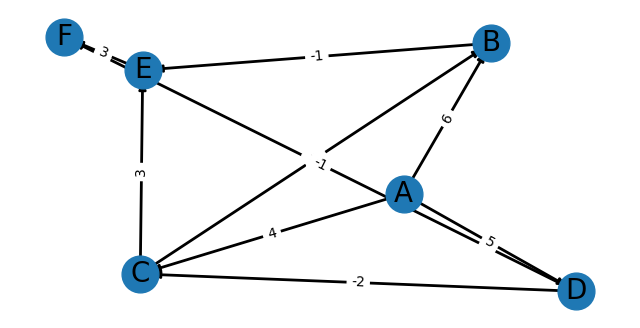

In [11]:
# Plot the graph
plt.figure(figsize=(8, 4))
pos_b = nx.spring_layout(G_b)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G_b, pos_b, node_size=700)

# Edges
nx.draw_networkx_edges(G_b, pos_b, width=2)

# Labels
nx.draw_networkx_labels(G_b, pos_b, font_size=20, font_family="sans-serif")

# Edge weight labels
edge_labels = nx.get_edge_attributes(G_b, "weight")
nx.draw_networkx_edge_labels(G_b, pos_b, edge_labels=edge_labels)

plt.axis('off')
plt.show()

##### Solution:

Initially, the distance of each vertex will be infinity from the source vertex and source-to-source distance value would be zero. So, considering A to be source vertex.

To relax the path for vertices and for edge u-v:
```
if d(u) + c(u,v) < d(v):
    d(v) = d(u) + c(u,v)
```
where d(u) $\to$ initial value of vertex u, c(u,v) $\to$ weight of the edge.

Relax all the edges (n-1) times, where n is the number of vertices: $6-1=5$.
List of all the edges:
- (A,B) (A,C) (A,D) (B,E) (D,C) (D,F) (C,E) (C,B) (E,F)

- First iteration:
    - Taking (A,B), d(u) = 0, d(v) = $\infty$ [initial set], c(u,v) = 6
        - 0 + 6 < $\infty$ $\to$ True $\to$ d(B) = 6
    - Taking (A,C), similar theory, d(C) = 4
    - Taking (A,D), similar theory, d(D) = 5
    - Taking (B,E), similar theory, d(E) = 6 + (-1) = 5 < $\infty$
    - Taking (C,E), 4 + 3 < 5 $\to$ False $\to$ Don't Update
    - Taking (D,C), similar theory, d(C) = 3
    - ...
- Second iteration:
    - ...
- Third iteration:
    - ...

Until no updations or changes in the iteration itself occurs, we will stop and write the shortest path of each vertex from the source node.

```
def bellman_ford(graph, source):
    # Initialization
    dist = [float('inf') for _ in range(len(graph))]
    dist[source] = 0
    pred = [None for _ in range(len(graph))]

    # Relaxation
    for _ in range(len(graph) - 1):
        for u in range(len(graph)):
            for v in range(len(graph)):
                if graph[u][v] != 0 and dist[u] + graph[u][v] < dist[v]:
                    dist[v] = dist[u] + graph[u][v]
                    pred[v] = u
    # Negative cycles
    for u in range(len(graph)):
        for v in range(len(graph)):
            if graph[u][v] != 0 and dist[u] + graph[u][v] < dist[v]:
                raise ValueError("Negative cycle detected")
    return dist, pred
```

## 2. A* algorithm

It is a simple and efficient search algorithm that can be used to find the optimal path between two nodes in a graph. It will be used for the shortest path finding.

It is an extension of *Dijkestra's algorithm*, which is that, we use a **heuristic function** that provides additional information regarding how far away from the goal node we are.

At each step, it picks the node with the smallest value of $f(n)$ where $f(n) = g(n) + h(n)$, where
- $n$ is the next node on the path.
- $g(n)$ is the cost of the path from the start node to $n$.
- $h(n)$ is the **heuristic function** that estimates the cost of the cheapest path from $n$ to the goal.
    - **Heuristics**:
        - They are basically educated guesses.
        - The actual cost cannot be calculated until the final cell is reached.
        - It will never *overestimate* the cost.

#### 2.1 Algorithm's details:

- Initial condition:
    We create two lists:
    - Open List
    - Closed List
- Initialization:
    - The *open list* must be initialized.
    - Put the starting node on the *open list* (leave its $f(n)$ at $0$).
    - Initialized the *closed list*.
- **[While]** the *open list* is not empty:
    - Find the node with the least $f$ on the *open list* and call it $q$.
    - Pop $q$ off the *open list*
    - Generate $q$'s 8 descendants and set $q$ as their parent.
    -   - **[For]** every descendant:
        - If finding a successor is the goal, cease looking.
        - Else, calculate $g$ and $h$ for the successor.
            - successor.$g$ = $q*g$ + distance between successor and $q$
            - successor.$h$ = distance from goal to successor (*)
            - successor.$f$ = successor.$g$ + successor.$h$
        - If a node with the same position as successor is in the *open list* which has a lower $f$ than successor, **skip** this successor.
        - If a node with the same position as soccessor is in the *closed list* which has a lower $f$ than successor, **skip** this successor. Otherwise, add the node to the open list.
        - **[End For Loop]**
    - Push $q$ on the *closed list*
    - **[End While Loop]**

(*): We have multiple heuristics that are able to implement.

- Pseudocode of the Algorithm:
```
function AStar(source, destination)

    queue = set containing source
    visited = empty set

    source.g = 0
    source.f = source.g + heuristic(source, destination)

    while queue is not empty
        currentNode = pop queue element with lowest f value

        if currentNode = destination
            return construct_path(destination) // path found
        
        remove currentNode from queue
        add currentNode to visited

        for each neighbor in neighbors(currentNode)
            if neighbor not in visited
                neighbor.f = neighbor.g + heuristic(neighbor, destination)
                if neighbor is not in queue
                    add neighbor to queue
                else // update g value if node already in queue
                    existingNeighbour = neighbor in queue
                    if neighbor.g < existingNeighbour.g
                        existingNeighbour.g = neighbor.g
                        existingNeighbour.parent = neighbor.parent
    return false // no path exists

    funtion neighbors(node)
        neighbors = set of valid neighbors to node
        for each neighbor in neighbors
            if neighbor is diagonal // if diagonal nodes can be visited from a node
                neighbor.g = node.g + diagonal_cost
            else
                neighbor.g = node.g + normal_cost
            neighbor.parent = node
        return neighbors

    function construct_path(node)
        path = set containing node
        while node.parent exists
            node = node.parent
            add node to path
        return path
```

#### 2.2 Heuristics:
There are 2 general methods that we can use to calculate the value of $h$:
- Determine $h$'s exact value (time-consuming)
    - Before using the algorithm, pre-calculate the distance between every pair of cells.
    - If there are no blocked cells, then we can use the distance formula *(Euclidean Distance)*,
- Utilize various techniques to approximate the value of $h$ (less time-consuming)
    - Manhattan Distance:
        - It is the total of the absolute values of the discrepancies between the $x$ and $y$ coordinates of the current and the goal cells.
        - $h = \|(cell_{current}.x - goal.x)\| + \|(cell_{current}.y - goal.y)\|$
        - We must use this method when we are only permitted to move in four directions: top, left, right, and bottom. 
        
        <img src="manhattan.png" width="300" height="200" alt="Description of image">

    - Diagonal Distance:
        - The greatest absolute value of differences between the $x$ and $y$ coordinates of the current cell and the goal cell.
        - $dx = \|(cell_{current}.x - goal.x)\|$
        - $dy = \|(cell_{current}.y - goal.y)\|$
        - $h = D*(dx+dy)+(D_2 - 2*D)*min(dx,dy)$
        - $D$ is the length of every node (default = 1), $D_2$ is the diagonal.
        - We use this heuristic method when we are permitted to move only in eight directions, like the King's moves in Chess.

        <img src="diagonal.png" width="300" height="200" alt="Description of image">
        
    - Euclidean Distance:
        - It is the distance between the goal cell and the current cell using the distance formula:
        - $h = sqrt[(cell_{current}.x - goal.x)^2 + (cell_{current}.y - goal.y)^2]$
        - We use this heuristic method when we are permitted to move in any direction of our choice.

        <img src="euclidean.png" width="300" height="200" alt="Description of image">

Sample of the algorithm's implementation:

In [12]:
# Sample
G_a = nx.DiGraph()
G_a.add_edge('A', 'B', weight=2)
G_a.add_edge('A', 'C', weight=4)
G_a.add_edge('B', 'D', weight=10)
G_a.add_edge('C', 'D', weight=22)

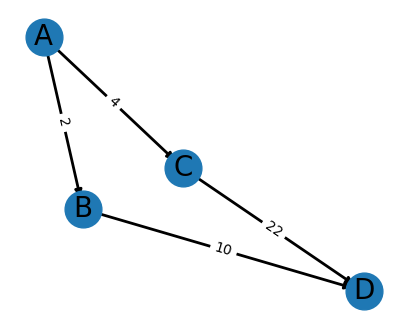

In [13]:
# Plot the graph
plt.figure(figsize=(5, 4))
pos_a = nx.spring_layout(G_a)  # positions for all nodes

# Nodes
nx.draw_networkx_nodes(G_a, pos_a, node_size=700)

# Edges
nx.draw_networkx_edges(G_a, pos_a, width=2)

# Labels
nx.draw_networkx_labels(G_a, pos_a, font_size=20, font_family="sans-serif")

# Edge weight labels
edge_labels = nx.get_edge_attributes(G_a, "weight")
nx.draw_networkx_edge_labels(G_a, pos_a, edge_labels=edge_labels)

plt.axis('off')
plt.show()

Consider the graph, A is the source, and D is the destination.

- The start is at A, which has $g=0$ and some initial heuristic value $h$. Therefore, $f(A) = g(A) + h(A) \to f(A) = 0 + 10$
- Next, condiser the path to the neighbouring vertices:
    - $f(A \to B) = g(A \to B) + h(A \to B) = 2 + 5 = 7$
    - $f(A \to C) = g(A \to C) + h(A \to C) = 4 + 6 = 10$
- Next, consider the path to the destination:
    - $f(A \to B \to D) = g(A \to B \to D) + h(A \to B \to D) = 10 + 3 = 13$
    - $f(A \to C \to D) = g(A \to C \to D) + h(A \to C \to D) = 22 + 5 = 27$
- We can see that choosing B from A gives the best path.

## Graph Coloring Problems


##### Definitions for graph coloring

- Proper coloring:
    - Assigning colors to the vertices, no two adjacent vertices have the same color.
- k-coloring:
    - A *proper coloring* involving a total of k colors.
- k-colorable:
    - A graph that has a *k-coloring* is said to be k-colorable.
- Chromatic Number:
    - The minimum number of colors in a *proper coloring* of the graph.


#### Common patterns and theorem for *proper coloring*:

- Planar graph:
    - A graph that can be embedded in the plane, i.e., can be drawn with no edges' intersection.
    - E.g., Complete graph $K_4$, Butterfly graph.
        - $K_n$ represents a graph with n vertices that all connect to each other.
- Nonplanar graph:
    - A graph that cannot realize what a *planar graph* can.
    - E.g., Complete graph $K_5$, Utility graph $K_{3,3}$
        - $K_{m,n}$ graph is structured with $m$ vertices on one part, and $n$ vertices on the other part, with both parts' vertices connect to the other part's vertices. There are edges existing only between parts, but not in either.
        - Common pattern: **Bipartite Graph**
        $\to$ A graph whose vertices can be divede into two disjoint and independents sets $U$ and $V$, that is, every edge connectes a vertex in $U$ to one in $V$.

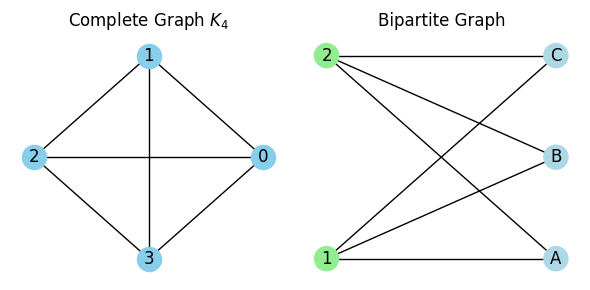

In [14]:
# Graph examples' showing

# Create K_4, a complete graph with 4 nodes
K_4 = nx.complete_graph(4)

# Create a simple bipartite graph
# This example uses a graph with 2 nodes in one set and 3 in the other
B = nx.Graph()
# Adding nodes with the bipartite attribute
B.add_nodes_from([1, 2], bipartite=0)  # One set of nodes
B.add_nodes_from(['A', 'B', 'C'], bipartite=1)  # Another set of nodes
# Adding edges
B.add_edges_from([(1, 'A'), (1, 'B'), (1, 'C'),
                  (2, 'A'), (2, 'B'), (2, 'C')])

# Set positions for K_4 using the circular layout
pos_K_4 = nx.circular_layout(K_4)

# For the bipartite graph, we can use the bipartite layout
# Need to identify the sets for layout purposes
top = nx.bipartite.sets(B)[0]
pos_B = nx.bipartite_layout(B, top)

# Now, draw the graphs side by side using Matplotlib's subplot feature
plt.figure(figsize=(6, 3))

# Plot K_4
plt.subplot(121)  # 1 row, 2 columns, 1st subplot
nx.draw(K_4, pos_K_4, with_labels=True, node_color='skyblue', edge_color='k')

plt.title('Complete Graph $K_4$')

# Plot Bipartite Graph
plt.subplot(122)  # 1 row, 2 columns, 2nd subplot
nx.draw(B, pos_B, with_labels=True, node_color=['lightgreen' if n in top else 'lightblue' for n in B], edge_color='k')

plt.title('Bipartite Graph')

plt.tight_layout()
plt.show()

*for the $K_4$, we can draw one of the diagonal line from the outer of the graph to avoid edges' intersection.*

## 3. Combinatorial Problem

- Rule of Product:
    - If there are $m$ ways to arrange something, and then $n$ ways to arrange something else after that, then the number of ways to arrange both of them is $m*n$.

- Rule of Sum
    - If there are $m$ ways to arrange something, and there are $n$ ways to arrange something else, and these arrangements cannot both happen, then the number of ways to arrange either of those things is $m+n$.

- Permutation
    - Given a set of $n$ distinct objects, let the set of permutations of those objects be $P$. Then $|P| = n!$
    - Given a set of $n$ objects, let the set of permutations of $k$ of those objects be $S$. Then $|S| = \frac{n!}{(n-k)!}$

- Combination
    - Given a set of $n$ distinct objects, let $C$ be the set of combinations of $k$ of those objects. Then $|C| = \binom{n}{k} = \frac{n!}{k!(n-k)!}$

- Binomial Theorem
    - $(a+b)^n = \sum_{k=0,n} \binom{n}{k} a^{n-k}b^k = \binom{n}{0}a^n+\binom{n}{1}a^{n-1}b+...+\binom{n}{n-1}ab^{n-1}+\binom{n}{n}b^n$

Here we will use two examples to demostrate the practice of combinatorial optimization:
- Permutations and Combinations.
    - Permutation:<br>
    It's arrangements of all or part of a set of objects, with regard to the order of the arrangement. E.g., the permutations of set [A,B] are (A,B) and (B,A)
    - Combination:<br>
    It refers to the selection of all or part of a set of objects without regard the order of the objects. E.g., the combinations of 2 elements from the set [A,B,C] are [A,B], [A,C], and [B,C].
    
For implementation, we will use `itertools`.

In [15]:
# List of elements
elements = ['A', 'B', 'C']

# Generate all permutations of the list
all_permutations = list(itertools.permutations(elements))
print("Permutations of ['A', 'B', 'C']:")
print(all_permutations)

# Generate all combinations of 2 elements from the list
combinations_of_two = list(itertools.combinations(elements, 2))
print("\nCombinations of 2 from ['A', 'B', 'C']:")
print(combinations_of_two)

Permutations of ['A', 'B', 'C']:
[('A', 'B', 'C'), ('A', 'C', 'B'), ('B', 'A', 'C'), ('B', 'C', 'A'), ('C', 'A', 'B'), ('C', 'B', 'A')]

Combinations of 2 from ['A', 'B', 'C']:
[('A', 'B'), ('A', 'C'), ('B', 'C')]


We can use the combinations into real-world scenarios, for instance, **Menu Planning**.

Scenario:<br>
A chef planning a special dinner menu where he wants to offer a choice of three appetizers. However, due to kitchen constraints, he can only prepare three out of five available appetizer options. He needs to determine all possible combinations of three appetizers to decide which ones to offer.<br>

Choosing 3 appetizers out of 5 is denoted as $\binom{5}{3}$

In [16]:
# For instance
appetizers = ['Spring Rolls', 'Salad', 'Bruschetta', 'Soup', 'Chicken Wings']
appetizer_combinations = list(itertools.combinations(appetizers, 3))

print("Possible appetizer combinations:")
for i, combination in enumerate(appetizer_combinations, 1):
    print(f"Combination {i}: {combination}")

Possible appetizer combinations:
Combination 1: ('Spring Rolls', 'Salad', 'Bruschetta')
Combination 2: ('Spring Rolls', 'Salad', 'Soup')
Combination 3: ('Spring Rolls', 'Salad', 'Chicken Wings')
Combination 4: ('Spring Rolls', 'Bruschetta', 'Soup')
Combination 5: ('Spring Rolls', 'Bruschetta', 'Chicken Wings')
Combination 6: ('Spring Rolls', 'Soup', 'Chicken Wings')
Combination 7: ('Salad', 'Bruschetta', 'Soup')
Combination 8: ('Salad', 'Bruschetta', 'Chicken Wings')
Combination 9: ('Salad', 'Soup', 'Chicken Wings')
Combination 10: ('Bruschetta', 'Soup', 'Chicken Wings')


Since in real-world scenario, we need to consider *preparation time* and *profit* for maximize the general profit for the restaurant, we would like to talk about another combinatorial optimization problem: `knapsack problem`.

Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible, which can be formulated as:
$$\text{Maximize } \sum_{i=1}^nv_ix_i$$
$$\text{subject to } \sum_{i=1}^n w_ix_i \leq W$$
$$x_i \in \{0,1\}$$
Where $v_i$ and $w_i$ are the value and weight of the items, $x_i$ indicates whether the item is taken *(1)* or not *(0)*, and $W$ is the maximum weight capacity of the knapsack.<br>
We will use `PuLP` here to define the LP Problem.

In [17]:
# Sample Case

# Define the problem
knapsack_problem = pulp.LpProblem("Knapsack_Problem", pulp.LpMaximize)

# Data: weights, values and the knapsack capacity
weights = [10, 20, 30]
values = [60, 100, 120]
capacity = 50
item_count = len(values)

# Decision variables: 0 or 1 (not taken or taken)
x = [pulp.LpVariable(f'x{i}', cat='Binary') for i in range(item_count)]

# Objective function
knapsack_problem += sum(values[i] * x[i] for i in range(item_count)), "Total_Value"

# Constraints
knapsack_problem += sum(weights[i] * x[i] for i in range(item_count)) <= capacity, "Total_Weight"

# Solve the problem
knapsack_problem.solve()

# Output results
print("Status:", pulp.LpStatus[knapsack_problem.status])
print("Maximum Value:", pulp.value(knapsack_problem.objective))
for i in range(item_count):
    print(f'x{i} = {x[i].varValue}')  # Outputs 0 or 1

Status: Optimal
Maximum Value: 220.0
x0 = 0.0
x1 = 1.0
x2 = 1.0


Now based on the `knapsack` case we've tried out above, let's set up some assumptions and find the optimal solution for the *meal plan*.

- Data:
    - Appertizers: Spring Rolls, Salad, Bruschetta, Soup, Chicken Wings
    - Profits: 5, 10, 15, 20, 25
    - Preparation Times: 30, 20, 45, 35, 60
    - Capacity: $T =120$ minutes of total preparation time
    - Constraint: $N=3$ appetizers only due to the kitchen restrictions.

- Mathematical Formulation:
    $$\text{Maximize }\sum_{i=1}^np_ix_i$$
    $$\text{subject to: } \sum_{i=1}^nt_ix_i \leq T, \sum_{i=1}^nx_i \leq N$$

In [18]:
# Create the problem variable:
meal_plan_problem = pulp.LpProblem("Meal_Plan_Max_Profit", pulp.LpMaximize)

# Define the data arrays:
appetizers = ['Spring Rolls', 'Salad', 'Bruschetta', 'Soup', 'Chicken Wings']
profits = [5, 10, 15, 20, 25]  # in dollars
preparation_times = [30, 20, 45, 35, 60]  # in minutes
capacity = 120  # total available preparation time in minutes
N = 3

# Define the decision variables:
x = pulp.LpVariable.dicts("x", appetizers, cat='Binary')

# Objective function: Maximize profit
meal_plan_problem += pulp.lpSum([profits[i] * x[appetizers[i]] for i in range(len(appetizers))]), "Total_Profit"

# Constraints:
# Do not exceed the total preparation time
meal_plan_problem += pulp.lpSum([preparation_times[i] * x[appetizers[i]] for i in range(len(appetizers))]) <= capacity, "Total_Preparation_Time"

# No more than three appetizers can be selected
meal_plan_problem += pulp.lpSum([x[appetizers[i]] for i in range(len(appetizers))]) <= N, "Limit_of_Three_Appetizers"

# Solve the problem
meal_plan_problem.solve()

# Output the results
print("Status:", pulp.LpStatus[meal_plan_problem.status])
print("Maximum Profit ($):", pulp.value(meal_plan_problem.objective))
for appetizer in appetizers:
    print(f'{appetizer}: {int(x[appetizer].varValue)}')  # Shows 0 or 1 if the appetizer is selected or not

Status: Optimal
Maximum Profit ($): 55.0
Spring Rolls: 0
Salad: 1
Bruschetta: 0
Soup: 1
Chicken Wings: 1


Based on the model we've built above, we got the best combo which is:<br>
*salad, soup, and chicken wings*, which will bring the max profit of **$55**.

## 4. Schedule Problem

Suppose we are responsible for scheduling times for lectures in a university.

We want to make sure that any two letures with a common student occur at different times to avoid a conflict.

We could draw a chart, put the various lectures, and mark with an **"X"** on any pair that has students in common.

| Lecture | A | B | C | D | E | F | G | H | I |
|---------|---|---|---|---|---|---|---|---|---|
|    A    |   | X | X | X |   |   | X |   |   |
|    B    | X |   |   |   |   |   |   |   | X |
|    C    | X |   |   | X |   | X | X | X |   |
|    D    | X |   | X |   |   | X |   |   | X |
|    E    |   |   |   |   |   | X | X |   | X |
|    F    |   |   | X | X | X |   | X | X | X |
|    G    | X |   | X |   | X | X |   |   |   |
|    H    |   |   | X |   |   | X |   |   |   |
|    I    |   | X |   | X | X | X |   |   |   |

We could also conveniently represent the information in the format of graph, 
with one vertex for each lecture, and in which two vertices are joined if there is a conflict between them:

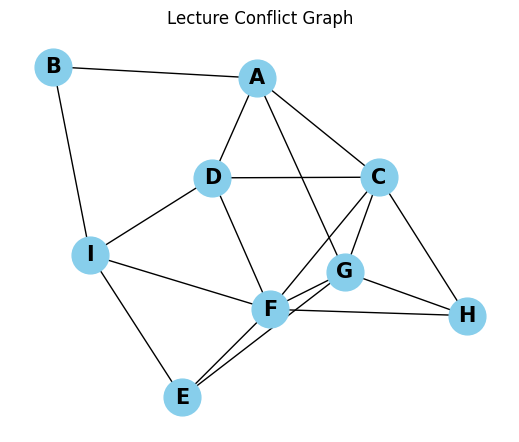

In [19]:
# Create graph
G =nx.Graph()

# Create and add nodes (lectures)
lectures = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
G.add_nodes_from(lectures)

# Create and add edges (conflicts)
conflicts = [("A", "B"), ("A", "C"), ("A", "D"), ("A", "G"),
             ("B", "I"),
             ("C", "D"), ("C", "F"), ("C", "G"), ("C", "H"),
             ("D", "F"), ("D", "I"),
             ("E", "F"), ("E", "G"), ("E", "I"),
             ("F", "G"), ("F", "H"), ("F", "I"),
             ("G", "H")]
G.add_edges_from(conflicts)

# Draw the graph using the spring layout
plt.figure(figsize=(5, 4))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=15, font_weight='bold')
plt.title('Lecture Conflict Graph')
plt.show()

Now, we cannot schedule two lectures at the same time if there is a conflict.

We can code each time with a color, and we would like to use as few separate times as possible.

The no-conflict rule means that we need to color the vertices of our graph in such a way that no two adjacent vertices (representing courses which conflicts with each other) have the same color.

We know that the chromatic number is definitely $\geq 3$, since there are structures of triangle.

Since there exist an external node that connects all vertices of one triangle, which construct $K_4$ pattern. E.g., $AFCG$

Therefore, the graph is a **4-coloring**.

Therefore, **we need at least 4 timeslots.**

We can also use networkx's `greedy_color` to find a coloring solution:

In [20]:
coloring = nx.coloring.greedy_color(G, strategy='largest_first')
coloring

{'F': 0, 'C': 1, 'G': 2, 'A': 0, 'D': 2, 'I': 1, 'E': 3, 'H': 3, 'B': 2}

We use `largest_first` strategy to etermine a coloring for the lecture conflict graph, which let us acquire **4 colors** in total.

*largest_first*:
1. Degree calculation:<br>
    The first step involves calculating the degree of each vertex in the graph.
2. Sorting vertices:<br>
    Once the degree are calculated, the vertices are sorted in descending order based on their degree. This means that the vertex with the highest degree is considered first, followed by the second highest, and so on.
3. Color Assignment:<br>
- Start with the vertext that has the highest degree.
- Assign the smallest available color that does not conflict with the colors assigned to its adjacent vertices.
- Proceed to the next vertex in the sorted list and repeat the color assignment process.
- This method ensures that the vertices that are most likely to cause conflicts are colored first, potentially reducing the overall number of colors needed.
4. Completion: <br>
    The process continues until all vertices are colored. The order in which vertices are addressed helps in managing the coloring efficiently by handling the most restrictive vertices first.

This coloring means that lectures with the same color number do not have scheduling conflicts and can be held at the same time. The result indicates that at least four different time slots are necessary to schedule all the lectures without any overlap in resources. 

We also have other strategies in the `greedy_color` functions, here we will cover two extra.

`random_sequential`

In [21]:
coloring_1 = nx.coloring.greedy_color(G, strategy='random_sequential')
coloring_1

{'B': 0, 'D': 0, 'H': 0, 'C': 1, 'A': 2, 'F': 2, 'I': 1, 'G': 3, 'E': 0}

The result can vary with each run because the order of nodes is randomized. <br>
This approach typically does not yield the most optimal number of colors, as seen by the need for four colors, similar to the result from the 'largest_first' strategy.

*Random sequential strategy*:
- It colors the vertices of the graph in a random order.
1. Vertex selection:<br>
    Initially, all vertices are uncolored. A list of all vertices is created.
2. Randomization:<br>
    The list of vertices is shuffled randomly.
3. Coloring Process:<br>
    The algorithm iterates through the randomly ordered list of vertices. For each vertex, it assigns the lowest-numbered color that has not yet been used by its adjacent vertices.
4. Repetition:<br>
    This process continues until all vertices are colored. The randomness of the vertex order can lead to different color assignments in different runs of the algorithm.
- This method does not guarantee an optimal solution and the number of colors used can vary significantly with each run, depending on the order in which vertices are processed.

`smallest_last`

In [22]:
coloring_2 = nx.coloring.greedy_color(G, strategy='smallest_last')
coloring_2

{'G': 0, 'F': 1, 'C': 2, 'H': 3, 'E': 2, 'I': 0, 'D': 3, 'A': 1, 'B': 2}

This strategy often results in a more efficient coloring, minimizing the number of colors compared to some other strategies.<br> 
However, in this case, it still required four colors. This might be due to how vertices are ordered according to their degree in the inverse elimination order, attempting to leave nodes with fewer choices (lower degree) more flexibility by coloring them last.

*Smallest Last Strategy*:
- It's more structured and often leads to better results compared to random or simple greedy approaches.
1. Vertex Degree Calculation:<br>
    Initially, the degree of each vertex is calculated
2. Vertex Selection for Removal:<br>
    In each iteration, the vertex with the smallest degree is selected and removed from the graph, along with its edges. The degrees of the remaining vertices are updated.
3. Ordering:<br>
    This process is repeated until all vertices are removed. The order in which vertices are removed is recorded, which is the smallest last ordering.
4. Coloring Process: <br>
    Starting with the last vertex in the smallest last order (the vertex removed first from the graph), the algorithm assigns the lowest available color that has not been used by its adjacent vertices.
5. Build Up: <br>
    The graph is essentially rebuilt in the reverse order of removal, with each vertex being colored as it is added back.

- This method effectively reduces the chances of high-degree vertices constraining the color choices later in the process. By dealing with potentially problematic vertices (those with fewer choices left) later, it often minimizes the number of colors needed.

Comparison:
- *Complex or large Graphs*:<br>
    `largest_first` tends to perform better because it deals with the most problematic vertices early on.
- *General Use*:<br>
    `smallest_last` is often more effective, as it leaves the least connected and thus most flexible vertices for last, potentially minimizing the color spread.
- *Unpredictable Conditions or simple cases*:<br>
    `random_sequential` might be chosen when the graph structure is unknown, or simplicity and speed are more critical than minimizing the number of colors.

Let's build up a large random graph by using `erdos_renyi_graph` in `networkx` to test out the performances of different models.<br>
We will set the probability of each pair of vertices' connections **super high** as *0.8* to see the effect of the model. 

In [44]:
# Increase the number of vertices to 100 and probability of an edge to 0.8
random_graph_large = nx.erdos_renyi_graph(n=100, p=0.8)

# Apply the three coloring strategies to the larger graph
coloring_random_sequential_large = nx.coloring.greedy_color(random_graph_large, strategy='random_sequential')
coloring_smallest_last_large = nx.coloring.greedy_color(random_graph_large, strategy='smallest_last')
coloring_largest_first_large = nx.coloring.greedy_color(random_graph_large, strategy='largest_first')

# Get the number of colors used by each strategy on the larger graph
num_colors_random_sequential_large = max(coloring_random_sequential_large.values()) + 1
num_colors_smallest_last_large = max(coloring_smallest_last_large.values()) + 1
num_colors_largest_first_large = max(coloring_largest_first_large.values()) + 1

(num_colors_random_sequential_large, num_colors_smallest_last_large, num_colors_largest_first_large)

(38, 33, 33)

Since it gives out different results per running, we will use visualization charts to see the differences of *min color used* among different methods.

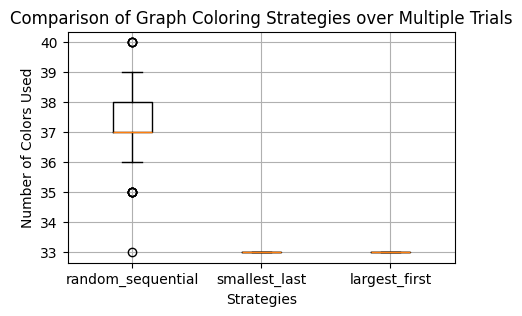

In [46]:
def run_coloring_trials(graph, trials, strategies):
    results = {strategy: [] for strategy in strategies}
    for _ in range(trials):
        for strategy in strategies:
            coloring = nx.coloring.greedy_color(graph, strategy=strategy)
            num_colors = max(coloring.values()) + 1
            results[strategy].append(num_colors)
    return results

trials = 100
strategies = ['random_sequential', 'smallest_last', 'largest_first']

coloring_results = run_coloring_trials(random_graph_large, trials, strategies)

# Plot the results
plt.figure(figsize=(5, 3))
plt.boxplot([coloring_results[strategy] for strategy in strategies], labels=strategies)
plt.title("Comparison of Graph Coloring Strategies over Multiple Trials")
plt.ylabel("Number of Colors Used")
plt.xlabel("Strategies")
plt.grid(True)
plt.show()

From the result, we could see that `smallest_last` performs the best, then the `largest_first`, and the `random_sequential` at the end. (*It might change*)

The result is expected to change according to the parameters' changing, while it is obvious that `smallest_last` and `largest_first` has a generally better performance, while `random_sequential` has a range of fluctuation on its performance.

## 5 Graph theory's general concepts

#### 5.1 Fundamental concepts

- A graph $G(V,E)$ is a set $V$ of *vertices* and a set $E$ of *edges*.

- An ordered pair of vertices is called a *directed* edge.

- We obtain a *multigraph* if we allow *multi-sets* of edges, i.e. multiple edges between two vertices.

- A *loop* is an edge between a vertex and itself. 

- In an *undirected* graph, an edge is an unordered pair of veritces.
    - An *undirected* graph without loops or *multiple edges* is known as a **simple** graph.

- If vertices $a$ and $b$ are endpoints of an edge, we say that they are *adjacent* and write $a \sim b$.

- If vertex $a$ is one of edge $e$'s endpoints, a is *incident* to $e$ and we write $a \in e$.

- The *degree* of a vertex is the number of edges *incident* to it.

- A *walk* is a sequence of vertices $v_1, v_2, ..., v_k$ such that $\forall i \in 1, 2, ..., k-1, v_i \sim v_{i+1}$.
    - A *closed walk* is a walk where $v_1 = v_k$.

- A *path* is a *walk* where $v_i \neq v_j, \forall i \neq j$, i.e. a *path* is a *walk* that visits each vertex at most *once*.
    - A *cycle* is a closed path, i.e. a path combined with the edge $(v_k, v_1)$
    - A graph is *connected* if there exists a path between each pair of vertices.
        - A *tree* is a *connected* graph with no cycles.
        - A *forest* is a graph where each connected component is a tree.
            - A node in a *forest* with degree 1 is called a *leaf*.

- The *size* of a graph is the number of vertices of that graph.
    - We usually denote the number of vertices with $n$ and the number of edges with $m$.

- If a graph $G(V,E)$ has any two of the following three properties, it has all three.
    - $G$ is connected
    - $G$ has no cycles
    - $|E| = |V| - 1$
    - Therefore, any graph with any two of these properties is a tree.

#### 5.2 Advanced concepts

- A *closed walk* (circuit) on graph $G(V, E)$ is an **Eulerian circuit** if it traverses each edge in $E$ exactly once.
- <img src="Eulerian.png" width="300" height="200" alt="Description of image">

    - We call a graph *Eulerian* if it has an *Eulerian circuit*.
    - Graph $G(V,E)$ is *Eulerian* iff $G$ is connected (except for possible isolated vertices) and the deegree of every vertex in $G$ is *even*.
    - $G$ has an *Eulerian path* iff it is connected and only two of its vertices have *odd* degrees.
    - Let $G(V,E)$ be a *directed* graph, it has an *Eulerian circuit* iff
        - $G$ is connected
        - $\forall v \in V$ $indegree(v) = outdegree(v)$
            - *indegree* of a vertex is the total count of its incoming edges.
            - *outdegree* of a vertex is the total count of its outgoing edges.

- A cycle $C$ in $G$ is **Hamiltonian** if it visits every vertex in $V$ exactly once.
- <img src="Hamiltonian.png" width="300" height="200" alt="Description of image">

- For a connected graph $G(V,E)$, a *spanning tree* of $G$, $T(G)$ is a subgraph of $G$ that is a *tree* and has vertex set $V$. Given the cost function $c(\cdot)$, the *minimum spanning tree* of $G$, $MST(G)$, is the *cheapest* connected subgraph.
- <img src="mst.png" width="300" height="200" alt="Description of image">

    - We are given a *connected* graph $G(V,E)$, each edge $e$ has a cost (weight) of $c(e) > 0$. Let the *cost* of $G$ to be $\sum_{e \in E}c(e)$

- The Greedy Algorithm: *Greedy-MST*
    - Given graph $G(V,E)$, initialize $E(T) = {}$ and $V(T)=V$
    - Re-index the edges $e_1, ..., e_m$ so that $c(e_{i_1})<c(e_{i_2})<...<c(e_{i_m})$
    - While $|E(T)| < |V| -1$, add the cheapest unused $e_{i_k}$ that does not create a cycpe.
    - Greedy-MST produces $T^* = MST(G)$

We can use *MST* in real-world scenario, for instance:<br>

**Network Design for Remote Sensors**<br>
Imagine being tasked with designing a network to connect remote environmetal sensors across a large conservation area.<br>
The goal is to minimize the total length of a cable required to connect all sensors to each other, ensuring that every sensor can communicate directly or indirectly with every other sensor.

*Mathematical Expression*:<br>
$$\text{Minimize } Z = \sum_{(i,j) \in E} w_{ij}x_{ij}$$
where
- $w_{ij}$ is the weight of the edge
- $x_{ij}$ is a binary variable that is 1 if is included, and 0 otherwise.
- $E$ is the set of all edges in the graph.

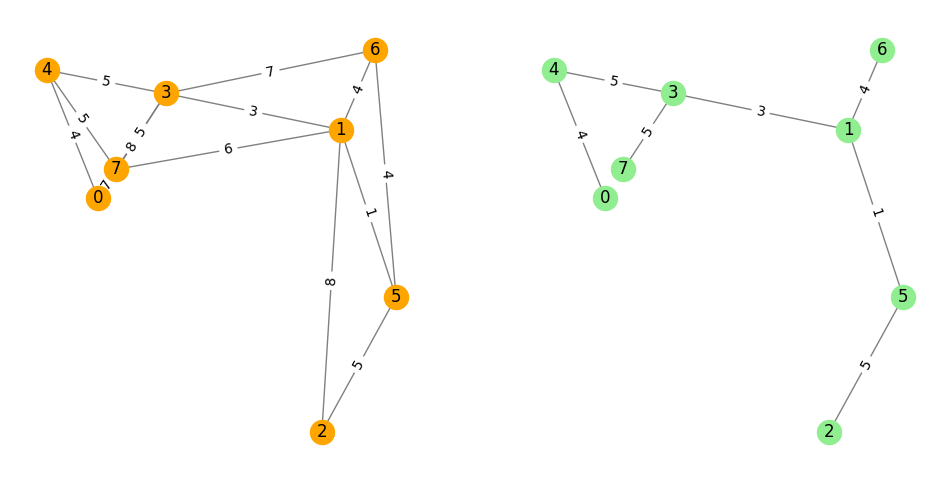

In [31]:
# Create a random geometric graph
G_mst = nx.random_geometric_graph(8, 0.5)

# Assign random weights to edges
for (u, v) in G_mst.edges():
    G_mst.edges[u, v]['weight'] = np.random.randint(1, 10)

# Compute the minimum spanning tree
mst = nx.minimum_spanning_tree(G_mst, weight='weight')

# Ensure all nodes have positions
pos_mst = nx.get_node_attributes(G_mst, 'pos')
if not pos_mst:
    pos_mst = nx.kamada_kawai_layout(G_mst) # for good looking

# Plot the original graph
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(G_mst, pos_mst, with_labels=True, node_color='orange', edge_color='gray')
labels_G = nx.get_edge_attributes(G_mst, 'weight')
nx.draw_networkx_edge_labels(G_mst, pos_mst, edge_labels=labels_G)

# Plot the MST
plt.subplot(122)
nx.draw(mst, pos_mst, with_labels=True, node_color='lightgreen', edge_color='gray')
labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos_mst, edge_labels=labels_mst)

plt.show()

As we can see above, based on the weights of edges, we find a **MST** that could help us optimize the saving.

## 6. TSP Problem

Mathematical Foundation:
$$\text{Minimize } Z = \sum_{i=1}^n \sum_{i \neq i, j = 1}^n c_{ij}x_{ij}$$
Where:
- $c_{ij}$ is the cost of traveling from city $i$ to $j$.
- $x_{ij}$ is a binary variable that is 1 if the path from $i$ to $j$ is part of the tour and 0 otherwise.

Subject to:
- Each city is entered and left exactly once:
$$\sum_{i=1, i\neq j}^nx_{ij} =1 \text{   } \forall j$$
$$\sum_{j=1, i\neq j}^nx_{ij} =1 \text{   } \forall i$$
- Subtour elimination (one way is the Miller-Tucker-Zemlin constraints)

Here we use `traveling_salesman_problem` in `networkx` to do some sample cases.

In [27]:
# Sample
tsp = nx.approximation.traveling_salesman_problem
G_tsp = nx.cycle_graph(9)
G_tsp[4][5]["weight"] = 5 # all other weights are 1
tsp(G_tsp, nodes=[3,6])

[3, 2, 1, 0, 8, 7, 6, 7, 8, 0, 1, 2, 3]

- `nx.cycle_graph(9)` creates a cycle graph with 9 nodes (0 through 8), forming a loop where each node is connected to two other nodes, creating a simple circular structure.
- `G[4][5]["weight"] = 5` assigns a weight of 5 to the edge connecting node 4 to node 5. In a cycle graph created by NetworkX, all edges by default have a weight of 1, unless explicitly specified otherwise. This command modifies the weight between nodes 4 and 5, making it heavier compared to others.
- `tsp` function, specifying only a subset of nodes [3, 6] to be visited. However, since a TSP in NetworkX is by default cyclic (returns to the start node), it calculates the shortest path that includes all nodes in the graph, not just the ones specified. This is evident as the resulting path includes all nodes in the cycle.
- `output` is the complete cycle starting and ending at node 3, visiting each node in between, including repeating some due to the cycle nature of the graph. This repetition (returning to node 6 and node 7 twice, etc.) indicates that it has found a cyclic route covering all nodes, not an optimal path for visiting only nodes 3 and 6.

In [32]:
path = tsp(G_tsp, cycle=False)
print(path)

[4, 3, 2, 1, 0, 8, 7, 6, 5]


`tsp(G, cycle=False)` computes the TSP path for the entire graph but without returning to the starting node, meaning it finds the shortest open-ended path that visits each node exactly once.

#### **Exploration: Simulated Annealing**

It is a probabilistic technique for approximating the global optimum of a given function. Specifically, it is a metaheuristic to approximate global optimization in a large search space for an optimization problem.

Simulated Annealing works by randomly picking a solution, then making a small change to the solution to create a "neighbor" solution. 

If the neighbor solution is better (i.e., it has a lower cost in terms of the problem being solved), it is accepted as the new current solution. If the neighbor solution is worse, it can still be accepted with a probability that depends on the difference in cost between the neighbor solution and the current solution and a global parameter $T$ (called the "temperature"), which gradually decreases during the process. 

As the temperature decreases, the probability of accepting worse solutions becomes smaller, which guides the search towards a global optimum.

- Temperature $T$:<br>
Controls the probability of accepting worse solutions. Starts high and decreases.
- Cooling schedule:<br>
Determins how the temperature is reduced in each iteration.

The core idea is to mimic the cooling proces of molten metal, allowing it to reach a low-energy crystalline state. In optimization terms, this *energy* refers to the cost function of the problem we want to minimize or maximize.


**General Algorithm: (implemented below)**

0. Parameters:
- `points`:<br>
A list or array of coordinates representing the points (cities)
- `initial_temp`:<br>
The starting temperature for the algorithm, influencing the probability of accepting worse solutions initially.
- `cooling_rate`:<br>
A factor between 0 and 1 by which the temperature is reduced in each iteration, controlling how quickly the algorithm cools down.
- `num_iterations`:<br>
The number of iterations the algorithm runs, determining how long the search continues before stopping.
1. Initialization:
- `current_temp` is set to `initial_temp` establishing the initial *temperature* of the system.
- `current_order` is initialized as a sequence of indices corresponding to the `points`, and then shuffled to create a random initial tour through the points.
- `current_distance` calculates the total travel distance for the `current_order` of points using the `total_distance` function, setting the initial *cost* or *energy* state of the system.
2. Iteration Loop:
- The function iterates `num_iterations` times, performing the following steps in each iteration:
3. General Neighbour:
- `new_order` copies the current order of points to start modifying it without affecting the original during comparisons.
- Two indices in `new_order` are chosen at random (`swap_idx`) and the points at these indices are swapped to create a new tour. This swap is a simple way to move to a neighbouring state in the solution space (a small tweak to the current solution).
4. Evaluate Neighbour:
- `new_distance` calculates the total distance for the `new_order`, determining the cost of the new solution.
- If `new_distance` is less than `current_distance`, the new solution is better, and it replaces the current solution.
- If `new_distance` is greater, the new solution is worse. However, it may still be accepted to escape potential local minima. The acceptance is based on the probability $e^{\frac{-\Delta E}{T}}$, where $\Delta E = $ `new_distance` - `current_distance` and $T = $ `current_temp`. This probability decreases as the difference in distance increases or as the temperature decreases.
5. Cooling:
- The temperature is reduced by multiplying `current_temp` by the `cooling_rate`. This gradual cooling reduces the likelihood of accepting worse solutions as the algorithm progresses, helping to stabilize toward the best found solution.
6. Result:
- After completing all the iterations, the function returns `current_order`, the arrangement of points representing the solution with the lowest found distance.

#### **Try-out: 3D TSP Problem Using Simulated Annealing**

We consider points in a 3D space and aim to find the shortest possible route that visits each point once and returns to the starting point.

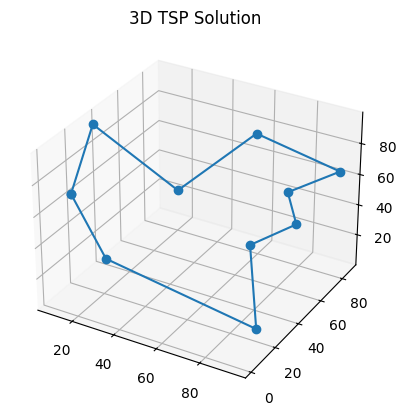

In [40]:
def generate_points(num_points):
    """Generate random 3D points."""
    return np.random.rand(num_points, 3) * 100

def total_distance(points, order):
    """Calculate the total distance of the path described by 'order'."""
    dist = 0
    for i in range(len(order)):
        start_point = points[order[i]]
        end_point = points[order[(i + 1) % len(order)]]
        dist += np.linalg.norm(start_point - end_point)
    return dist

def plot_tour(points, order, title="3D TSP Solution"):
    """Plot the tour in 3D."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = points[order][:, 0]
    y = points[order][:, 1]
    z = points[order][:, 2]
    
    # Append the first point to close the loop
    x = np.append(x, points[order[0]][0])
    y = np.append(y, points[order[0]][1])
    z = np.append(z, points[order[0]][2])
    
    ax.plot(x, y, z, marker='o')
    ax.set_title(title)
    plt.show()

def simulated_annealing(points, initial_temp, cooling_rate, num_iterations):
    current_temp = initial_temp
    current_order = np.arange(len(points))
    np.random.shuffle(current_order)
    current_distance = total_distance(points, current_order)
    
    for i in range(num_iterations):
        new_order = current_order.copy()
        # Swap two points to generate a neighbor solution
        swap_idx = np.random.randint(0, len(points), size=2)
        new_order[swap_idx[0]], new_order[swap_idx[1]] = new_order[swap_idx[1]], new_order[swap_idx[0]]
        
        new_distance = total_distance(points, new_order)
        
        if new_distance < current_distance or np.random.rand() < math.exp((current_distance - new_distance) / current_temp):
            current_order = new_order
            current_distance = new_distance
        
        # Reduce the temperature
        current_temp *= cooling_rate
    
    return current_order

# Constants
NUM_POINTS = 10
INITIAL_TEMP = 1000
COOLING_RATE = 0.995
NUM_ITERATIONS = 10000

# Generate random points in 3D space
points = generate_points(NUM_POINTS)

# Solve the 3D TSP using Simulated Annealing
order = simulated_annealing(points, INITIAL_TEMP, COOLING_RATE, NUM_ITERATIONS)

# Plot the solution
plot_tour(points, order)

Correlation of TSP with Hamiltonian Cycle:

The TSP is essentially a problem of finding a Hamiltonian cycle of minimum weight in a weighted complete graph. The Hamiltonian cycle aspect comes from the requirement that each city must be visited exactly once, and the cycle must return to the starting point.<br> The key difference in the TSP is the focus on minimizing the total travel cost, which adds an optimization layer to the pure existence problem of a Hamiltonian cycle.

## Practical Problem: 
## 7. Combination of **Shortest Path Problems** and **Graph Coloring**

#### Optimization of Urban Traffic Flow and Emergency Response Routes

- Background:<br>
In urban environments, traffic congestion is a common challenge that directly impacts emergency response times. Efficient traffic management at intersections and optimized routing for emergency services are crucial for public safety and urban efficiency. This project aims to leverage discrete mathematics to tackle these challenges.

- Mathematical Foundation:<br>
    - Graph Theory: <br>The urban road network is modeled as a graph with intersections as nodes and roads as edges.
    - Graph Coloring: <br>Each node (intersection) is assigned a "color" representing traffic control mechanisms, ensuring that no two adjacent intersections have conflicting controls.
    - Shortest Path Problem: <br>Algorithms such as Dijkstra's or A* are used to calculate the quickest routes for emergency vehicles across the colored graph, taking into account the time delays at each intersection based on its "color."

- Procedures:<br>
    - Data Collection: <br> Gather data on urban traffic patterns, intersection layouts.
    - Graph Modeling: <br>Construct a graph model of the urban area, with intersections and road segments accurately represented.
    - Color Assignment: <br>Implement a graph coloring algorithm to classify intersections by traffic control type to minimize wait times.
    - Route Optimization: <br>Apply a shortest path algorithm to the colored graph to find optimal routes for emergency services.
    - Algorithm Development: <br>Develop custom algorithms that account for both intersection delays (colors) and road distances (edges).

- Implementation:
    - Use *Geographical Information System (GIS)* to visualize and manage spatial data.

Final check error - Edge (286350391, hospital_2) has invalid 'length': {'length': 0}
Final check error - Edge (426518879, hospital_0) has invalid 'length': {'length': 0}
Final check error - Edge (11084747824, hospital_1) has invalid 'length': {'length': 0}
Final check error - Edge (11112859089, hospital_3) has invalid 'length': {'length': 0}
Final check error - Edge (hospital_0, 426518879) has invalid 'length': {'length': 0}
Final check error - Edge (hospital_1, 11084747824) has invalid 'length': {'length': 0}
Final check error - Edge (hospital_2, 286350391) has invalid 'length': {'length': 0}
Final check error - Edge (hospital_3, 11112859089) has invalid 'length': {'length': 0}


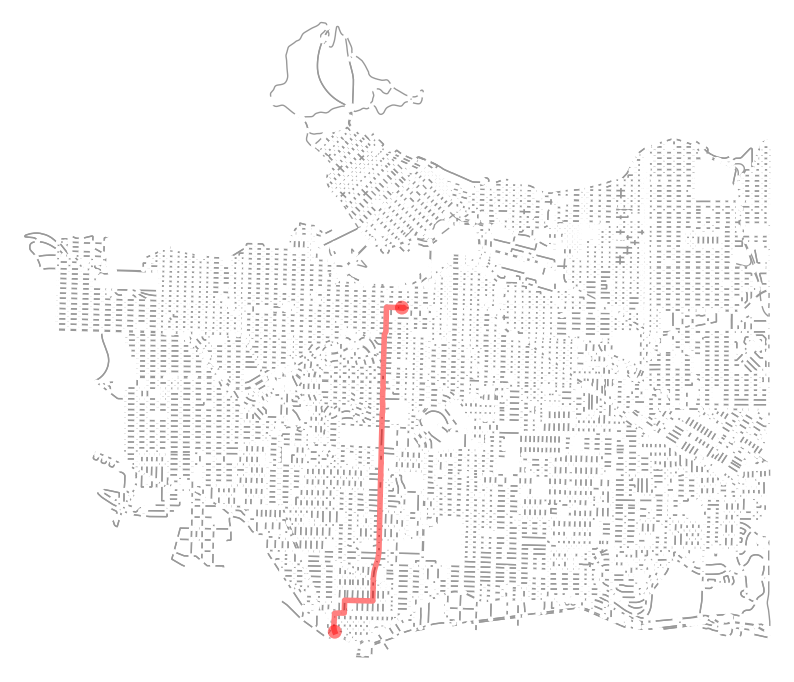

In [125]:
def calculate_edge_lengths(G):
    for u, v, data in G.edges(data=True):
        if 'length' not in data or not isinstance(data['length'], float):
            node_u = G.nodes[u]
            node_v = G.nodes[v]
            point_u = (node_u['y'], node_u['x'])  # latitude, longitude
            point_v = (node_v['y'], node_v['x'])  # latitude, longitude
            data['length'] = float(geopy.distance.geodesic(point_u, point_v).meters)

        if not isinstance(data['length'], float):
            print(f"Edge ({u}, {v}) length is not a float: {data['length']}")

    return G

# Function to create a graph from OSM data within the specified bounding box
def create_road_graph(place_name):
    G = ox.graph_from_place(place_name, network_type='drive')
    G = ox.utils_graph.get_largest_component(G, strongly=True)
    return G

# Function to color intersections
def color_intersections(G):
    # Initialize color mapping
    intersection_colors = {}

    for i, node in enumerate(G.nodes):
        intersection_colors[node] = i % 4  # Assuming 4 different traffic control types

    return intersection_colors

# Function to find shortest path for emergency vehicles considering intersection delays
def find_emergency_routes(G, intersection_colors, start, end):
    def weight(u, v, d):
        # Handle multiple edges and select the edge with minimum length
        if isinstance(d, dict):
            # Get the minimum 'length' among the parallel edges
            min_length = min(d[key]['length'] for key in d if 'length' in d[key])
        else:
            min_length = d['length'] if 'length' in d else float('inf')

        #u_color = intersection_colors[u]
        #v_color = intersection_colors[v]
        u_color = intersection_colors.get(u, 0)  # Default color if not found
        v_color = intersection_colors.get(v, 0)  # Default color if not found
        delay = 1  # Base delay for traversal
        if u_color != v_color:
            delay += 3  # Adjust delay based on intersection color

        return min_length + delay

    # Find the shortest path using the defined weight function
    shortest_path = nx.shortest_path(G, source=start, target=end, weight=weight)
    return shortest_path


# Function to visualize the graph and shortest path
def visualize_graph(G, path):
    # Ensure the graph is ready for plotting (this should already be the case)
    G = ox.project_graph(G)

    # Create figure and ax
    fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
    ox.plot_graph(G, ax=ax, show=False, close=False)  # Basic plot of the graph

    # Plot the path
    ox.plot_graph_route(G, path, route_color='red', orig_dest_node_size=100, ax=ax)

    # Plot hospital locations
    for idx, row in df_hospitals.iterrows():
        ax.scatter(row['lon'], row['lat'], c='blue', s=100, label=f'Hospital {idx}' if idx == 0 else "", zorder=3)
   
    ax.legend()

    plt.show()

# Main execution
place_name = "Vancouver, Canada"
G_rd = create_road_graph(place_name)

# Call the function to calculate edge lengths
G_rd = calculate_edge_lengths(G_rd)

# Verify if all edges have 'length' attribute
edge_data = nx.get_edge_attributes(G_rd, 'length')
if not edge_data:
    raise ValueError("No 'length' attribute found on any edge.")

# Continue with assigning colors to intersections and finding emergency routes
intersection_colors = color_intersections(G_rd)

# Load hospital data
df_hospitals = pd.DataFrame({
    'lat': [49.26238, 49.24467, 49.28496, 49.28098],
    'lon': [-123.12250, -123.12518, -123.13696, -123.12828]
})

nearest_node = ox.nearest_nodes(G_rd, X=df_hospitals['lon'].tolist(), Y=df_hospitals['lat'].tolist())

# Loop through each hospital and connect it to the graph
for idx, nearest_node in enumerate(nearest_node):
    hospital_node_id = f'hospital_{idx}'  # Create a unique node ID for the hospital
    G_rd.add_node(hospital_node_id, y=df_hospitals.iloc[idx]['lat'], x=df_hospitals.iloc[idx]['lon'])
    G_rd.add_edge(hospital_node_id, nearest_node, length=0)  # Connect hospital to nearest road node
    G_rd.add_edge(nearest_node, hospital_node_id, length=0)
    intersection_colors[hospital_node_id] = 0

# Choose arbitrary start and end nodes for the emergency route
# start, end = list(G_rd.nodes())[0], list(G_rd.nodes())[-1]

# Choose the closest hospital to the start node as the end node for routing
start = list(G_rd.nodes())[0]
end = ox.nearest_nodes(G_rd, df_hospitals['lon'].iloc[0], df_hospitals['lat'].iloc[0])

# Find the shortest path for emergency routes
shortest_path = find_emergency_routes(G_rd, intersection_colors, start, end)

for u, v, data in G_rd.edges(data=True):
    if 'length' not in data or not isinstance(data['length'], float):
        print(f"Final check error - Edge ({u}, {v}) has invalid 'length': {data}")

# Visualize the shortest path on the graph
visualize_graph(G_rd, shortest_path)

- `calculate_edge_lengths(G)`:

Iterates over all edges in the graph.

Calculates the geodesic distance (the shortest distance on the earth's surface) between the two nodes (u and v) that define each edge if a length is not already present.

Sets this geodesic distance as the 'length' attribute for each edge.
- `create_road_graph(place_name)`:

Creates a graph based on OpenStreetMap data for a given place name ("Vancouver, Canada" in this case).

Retrieves only the largest strongly connected component of the graph, which is useful for ensuring that every node can reach every other node via directed paths.
- `color_intersections(G)`:

Assigns a color (modulus 4) to each node in the graph, simulating traffic control devices at intersections.

This is the graph coloring part of your code. Each color could represent a different type of traffic control, such as stop signs or traffic lights.
- `find_emergency_routes(G, intersection_colors, start, end)`:

Defines a weight function that adds traversal delays based on the color of the intersections (nodes). If two consecutive nodes have different colors, a delay is added, simulating the wait at different types of traffic signals.

Uses NetworkX's `shortest_path` function to find the shortest path from the start node to the end node, considering the weights (including any added delays).

This function addresses the shortest path problem by finding the path with the minimum sum of weights (distances and delays).
- `visualize_graph(G, path)`:

Plots the graph and the shortest path using OSMnx's plotting functions.

Highlights the path in red.

- `Main Execution`:
    - Sets up the graph, calculates edge lengths, assigns colors to intersections.
    - Loads hospital data and connects each hospital to the nearest road node in the graph.
    - Chooses a start node arbitrarily and finds the nearest hospital (end node).
    - Finds the shortest path from the start to the nearest hospital.
    - Checks that all edges have valid lengths and prints any errors.
    - Calls visualize_graph to show the path on the graph.

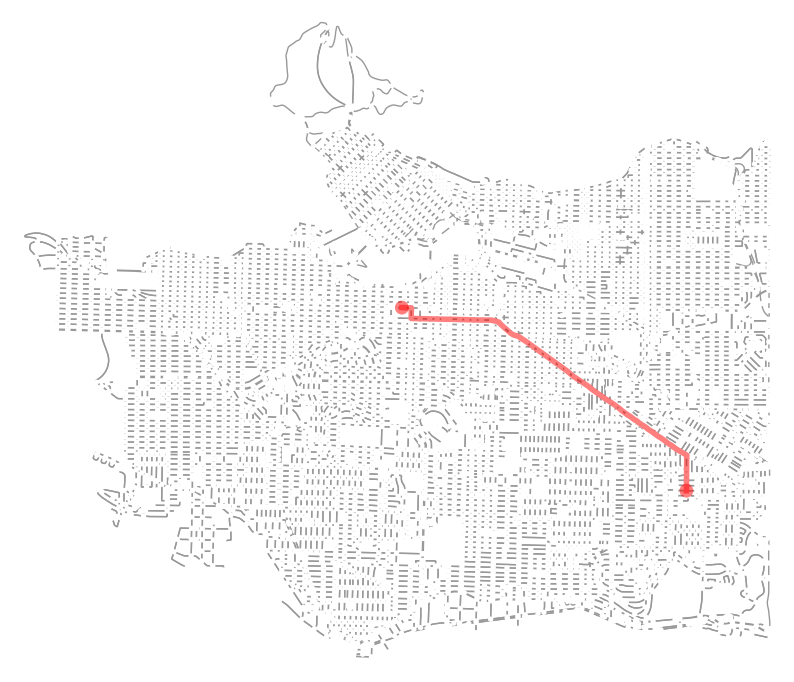

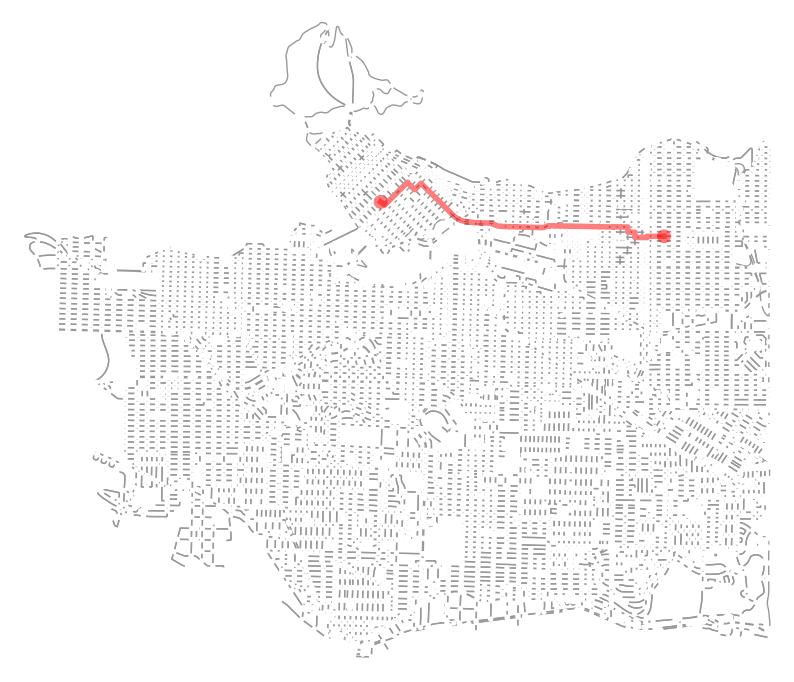

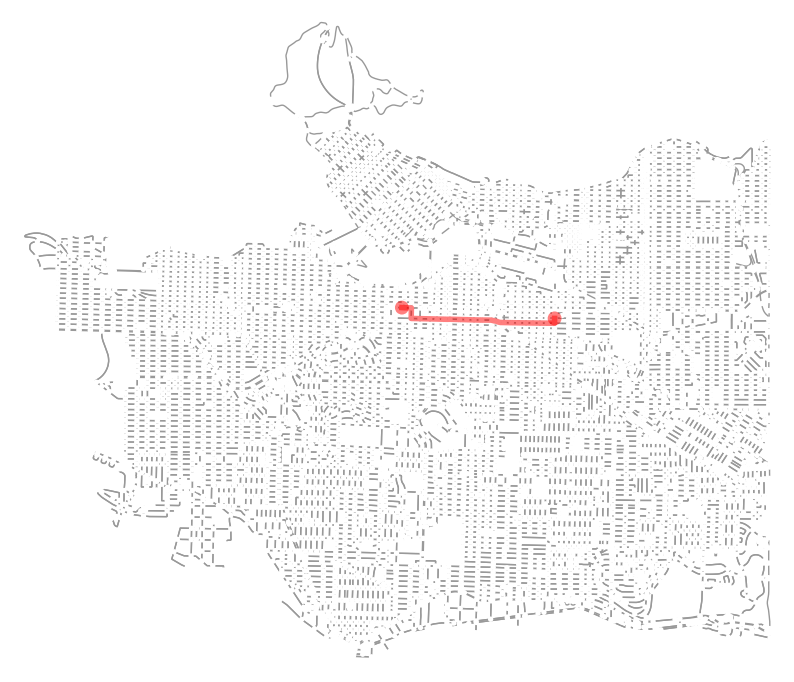

In [120]:
# Get a random sample of nodes from the graph
random_starts = random.sample(list(G_rd.nodes), 3)

# Calculate the shortest path from each random start to the nearest hospital
for start in random_starts:
    # Use try-except to handle the case where no path may exist
    try:
        # Find the nearest hospital to this start node
        hospital_distances = {}
        for hospital_node_id in range(len(df_hospitals)):
            hospital_node = f'hospital_{hospital_node_id}'
            distance = nx.shortest_path_length(G_rd, start, hospital_node, weight='length')
            hospital_distances[hospital_node] = distance
        
        # Find the nearest hospital and the shortest path to it
        nearest_hospital = min(hospital_distances, key=hospital_distances.get)
        shortest_path_to_hospital = find_emergency_routes(G_rd, intersection_colors, start, nearest_hospital)
        
        # Visualization can be done here as well, similar to the visualize_graph function
        visualize_graph(G_rd, shortest_path_to_hospital)

    except nx.NetworkXNoPath:
        print(f"No path found from node {start} to any hospital.")


Generally, this code models an urban road network and identifies the optimal route for an emergency vehicle from a given start point to the nearest hospital. 

It uses **graph coloring** to introduce delays at intersections with different traffic control types and solves the **shortest path problem** to minimize travel time considering these delays.

For real-world scenario implementation, this can rely on more practical data to make a better optimized prediction.

## Cover Letter

In my opinion, there is nothing more important to learn from this class than exploring the various math-based **python packages**, using them, and trying to solve **real-life problems**. The complexity of the problems can be very low, but this lesson was a successful first step towards taking the knowledge from the book and applying it flexibly. Among the libraries, *pulp, osmnx, networkx*, and *cvxpy* were the most engaging and interesting.

Based on the principle of focusing on solving real-life problems, this portfolio starts with the **shortest path problem** in the first part, which covers classical algorithms such as *dijkestra, bellman ford, and A* *, and introduces their mathematical backgrounds, algorithmic steps, and analysis of their principles, with pseudo-code and simple examples of walking through them. walking through.

Subsequently, as the group project is more oriented towards linear programming, the second part of this portfolio will focus on **graph coloring**, including and not limited to *combinatorial optimization*, and an introduction to *graph theory*. At the same time, this part focuses more on real-life applications, using python to implement real-world problems such as *profitable portfolio optimization for business (restaurants), schedule problem, detector network distribution (MST)* and *TSP*. 

In the TSP section, the mathematical knowledge is extended to the practice of **simulated annealing** in order to realize the attempt of optimal solution of *TSP in 3D*. Due to its in-depth background in physics, chaotic systems, and metaheuristic, the section fails to fully explain all the theory behind it in a clear and comprehensive manner, but still achieves a simple optimization of 3D TSP by replicating pseudo-code.

Finally, this portfolio explores the merger of graph coloring and shortest path problem with an autonomous attempt to find a direction that can solve a real problem: **optimizing urban emergency route planning**. Here, graph coloring is applied to the definition of the kind of nodes to assist in the assignment of route weights, and shortest path problem is used to find the nearest (LEAST COST) hospital from any point. Some of the data in this project is still based on assumptions, but the geographic information related to hospital addresses and maps has already been realized. Therefore, the direction of the project's future deepening is very clear.

There is no part of writing the entire portfolio that I am more proud of than finally *merging graph coloring with the shortest path problem* in order to solve the actual problem. This involved a lot of **personal definition**, such as the rules for assigning route weights, the direction of the actual problem, and the **application of the knowledge points covered in the portfolio**. I think this is a relatively good summary of the entire portfolio and echoes the title of the class to solve real problems.

Indeed, the challenges are not to be underestimated, the **code compilation** can be very frustrating at times, as it involves a lot of coverage of programming theory and long debugging sessions. The understanding of algorithms, especially the mathematics behind some of the algorithms, e.g., *heuristic, metaheuristic, simulated annealing, etc.*, is backed up by a large amount of theories. Sometimes it can be relatively difficult to understand, because the analysis of the application of the knowledge in the actual problem is sometimes ambiguous, and some steps need to be thought out by myself. However, once the knowledge behind it was figured out, and once the code complied with no mistakes eventually, the joy behind it is indescribable. It also makes me realize that how enjoyable it is if you could do a self-paced study on topics you're interested in.

In case the opinion is taken, I would bring up my thought of how do I write the portfolio here: *find out the topic you're enthusiastic with, find out as much relevant real-world implementation as possible, figure out the mathematical theory behind it before keeping going.* Last but not the least, *keep the passion, because for this portfolio, Tuum Est!*

#### Grade Proposal:

From the perspective of mathematical exploration, including but not limited to the explanations to the theories and algorithms, manual writing for the procedures of mathematical implementation in markdown, new areas' explorations like simulated annealing, I would give a 80%.

From the perspective of creativity, including the real-world scenarios' practice based on different theories and algorithms respectively, and the combination of the whole portfolio's general directions for an ultimated project, I would give a 88%.

From the perspective of effort paying, including the notations of the mathematical foundations, python coding, libraries explorations, etc, I would give a 88%.

In conclusion, a 86% in general is ideal in my opinion, and thank you for justification!